# **Imports**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the dataset**


In [ ]:
url = "https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv"
wine_data = pd.read_csv(url)

In [ ]:
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
wine_labels = wine_data['Customer_Segment']
wine_features = wine_data.drop('Customer_Segment', axis=1)

# **Standardize the features**

In [ ]:
scaler = StandardScaler()
wine_features_scaled = scaler.fit_transform(wine_features)

In [ ]:
wine_features_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# **Apply PCA**

In [ ]:
pca = PCA()
wine_pca = pca.fit_transform(wine_features_scaled)

In [ ]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
explained_variance_ratio

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

# **Plot cumulative explained variance**

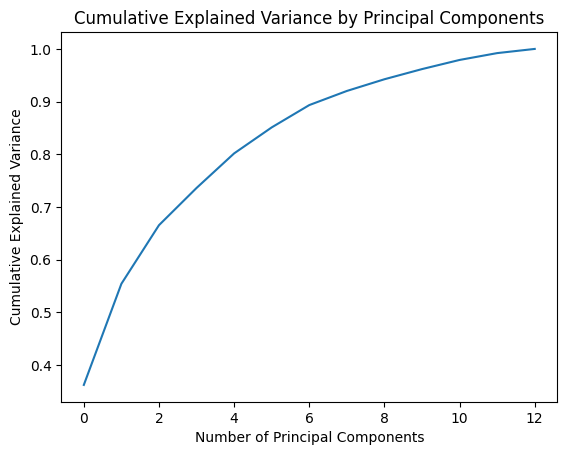

In [ ]:
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()

# **Number of components that capture a certain amount of variance (e.g., 95%)**

In [ ]:
n_components = len(cumulative_explained_variance[cumulative_explained_variance < 0.95]) + 1

In [ ]:
n_components

10

# **PCA with the selected number of components**

In [ ]:
pca = PCA(n_components=n_components)
wine_pca = pca.fit_transform(wine_features_scaled)

# **Visualizing the transformed data using the first two principal components**

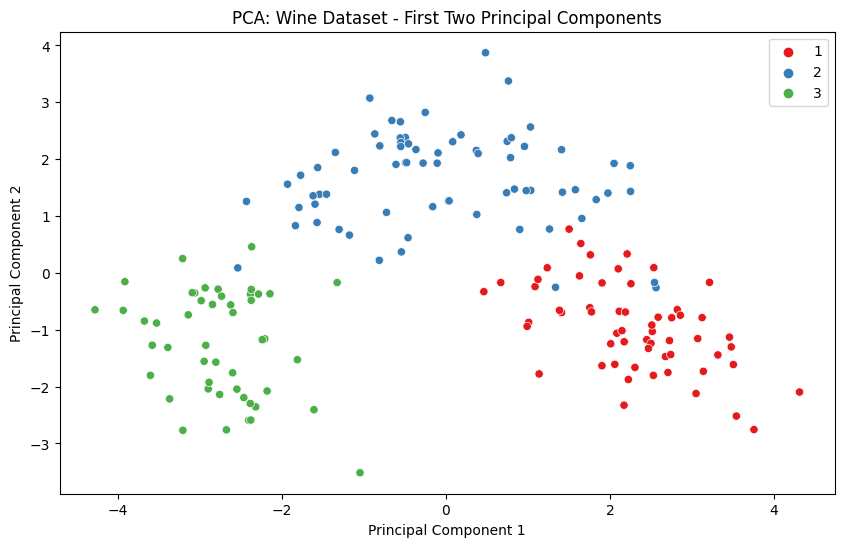

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=wine_pca[:, 0], y=wine_pca[:, 1], hue=wine_labels, palette='Set1')
plt.title('PCA: Wine Dataset - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()